# Atlas notebooks

***

> This notebook reproduces and extends parts of the figures and products of the AR6-WGI Atlas. It is part of a notebook collection available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purposes. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Calculation and hatching of the uncertainty in projected delta changes.

08/07/2021

**M. Iturbide** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Santander, Spain).

This notebook is an example of uncertainty visualization in projected delta changes. Example data available at [auxiliary-material](./auxiliary-material) is used. The advanced method for the uncertainty visualization of the Atlas Chapter and the Interactive Atlas is the one included in [datasets-interactive-atlas/04_map_figures.R](../datasets-interactive-atlas/04_map_figures.R). Additionally, the base hatching R-functions are defined in [datasets-interactive-atlas/hatching-functions/hatching-functions.R](../datasets-interactive-atlas/hatching-functions/hatching-functions.R). 

The two main sections in this notebook provide two ways of creating maps:
 * (A) The **easy ONE-STEP way** to create maps including uncertainty information 
 * (B) The **explicit STEP-BY-STEP way** to create maps including uncertainty information 

### Load libraries, functions

We will use the following climate4R libraries:
 * `loadeR` to load data ([Iturbide et al., 2018](https://doi.org/10.1016/j.envsoft.2018.09.009))
 * `visualizeR` for data visualization ([Frías et al., 2018](https://doi.org/10.1016/j.envsoft.2017.09.008))
 
We will also need:
 * `sp` to work with spatial data ([Pebesma & Bivand, 2005](https://cran.r-project.org/doc/Rnews/Rnews_2005-2.pdf))

In [1]:
library(loadeR)
library(visualizeR)
library(sp)

Loading required package: rJava

Loading required package: loadeR.java

Java version 1.7x amd64 by Oracle Corporation detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.3 (2021-07-05) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.7.0 (2020-09-18) is loaded


Get the latest stable version (1.7.1) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.

Loading required package: transformeR




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.2 (2021-07-07) is loaded

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.0 (2020-05-23) is loaded


Get the latest stable version (1.6.1) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



The base **hatching R-functions** are defined in [datasets-interactive-atlas / hatching-functions / hatching-functions.R](../datasets-interactive-atlas/hatching-functions/hatching-functions.R). Additionally, a wrapper function applying the previous is also available in [datasets-interactive-atlas / hatching-functions / AR6.WGI_hatching.R](../datasets-interactive-atlas/hatching-functions/AR6.WGI_hatching.R). To load the functions in the working environment use the `source` R base function as follows.

In [2]:
source("../datasets-interactive-atlas/hatching-functions/hatching-functions.R")
source("../datasets-interactive-atlas/hatching-functions/AR6-WGI-hatching.R")

### (A) The easy ONE-STEP way to create maps including uncertainty information 

The ONE-STEP way uses the `AR6.WGI_hatching` function. It requires one or two objects; the delta change and, if the advanced method is chosen, the historical reference as well.

The **data used in this example** is available under the [auxiliary-material](./auxiliary-material) folder. They are two NetCDFs of CMIP6 data for Europe, containing the ssp58.5 precipitation delta change for the long term (2081-2100 w.r.t 1995-2014 baseline) and annual precipitation data for the historical reference 1850-1900 (pre-industrial) respectively.

You can use the `dataInventory` function from `loadeR` to check basic data information, e.g.:

In [3]:
di <- dataInventory("auxiliary-material/CMIP6_SAM_historical_JJA_pr_1850-1900_annual.nc")
str(di)

[2021-08-03 16:03:35] Doing inventory ...

[2021-08-03 16:03:36] Retrieving info for 'pr' (0 vars remaining)

[2021-08-03 16:03:36] Done.



List of 1
 $ pr:List of 7
  ..$ Description: chr "Precipitation"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:4] 51 33 69 50
  ..$ Units      : chr "mm"
  ..$ DataSizeMb : num 23.2
  ..$ Version    : logi NA
  ..$ Dimensions :List of 4
  .. ..$ member:List of 3
  .. .. ..$ Type  : chr "Ensemble"
  .. .. ..$ Units : chr ""
  .. .. ..$ Values: chr [1:33] "ACCESS-CM2_r1i1p1f1" "ACCESS-ESM1-5_r1i1p1f1" "BCC-CSM2-MR_r1i1p1f1" "CAMS-CSM1-0_r2i1p1f1" ...
  .. ..$ time  :List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "365.24 days"
  .. .. ..$ Units     : chr "days since 1850-06-01 12:00:00 GMT"
  .. .. ..$ Date_range: chr "1850-06-01T12:00:00Z - 1900-06-01T12:00:00Z"
  .. ..$ lat   :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:69] -56.5 -55.5 -54.5 -53.5 -52.5 -51.5 -50.5 -49.5 -48.5 -47.5 ...
  .. .. ..$ Shape      : int 69
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon   :List 

Note that there are 33 CMIP6 models ("member" dimension). 

These data can be loaded into variables using `loadGridData`.

In [4]:
ref <- loadGridData("auxiliary-material/CMIP6_SAM_historical_JJA_pr_1850-1900_annual.nc", var = "pr")
delta <- loadGridData("auxiliary-material/CMIP6_SAM_ssp585_JJA_pr_2081-2100_delta.nc", var = "pr")

[2021-08-03 16:03:36] Defining geo-location parameters

[2021-08-03 16:03:36] Defining time selection parameters

[2021-08-03 16:03:36] Retrieving data subset ...

[2021-08-03 16:03:41] Done

[2021-08-03 16:03:42] Defining geo-location parameters

[2021-08-03 16:03:42] Defining time selection parameters

[2021-08-03 16:03:42] Retrieving data subset ...

[2021-08-03 16:03:42] Done



We only need to apply the `AR6.WGI_hatching` function, which includes the `method` parameter to select the uncertainty method ("simple" in the next cell). Optionally, a list of additional parameters from the `map.hatching` function (package *visualizeR*) can be passed to argument `map.hatching.args` to control the appearance of the hatches, i.e. density, direction, color, ... (type `?map.hatching` for specific documentation). Finally, additional arguments from the `spatialPlot` function can be also included to control graphical parameters (e.g. `color.theme = "BrBG"`)

[2021-08-03 16:03:42] - Aggregating members...

[2021-08-03 16:03:42] - Done.

[2021-08-03 16:03:42] - Computing climatology...

[2021-08-03 16:03:42] - Done.

[2021-08-03 16:03:43] - Aggregating members...

[2021-08-03 16:03:43] - Done.



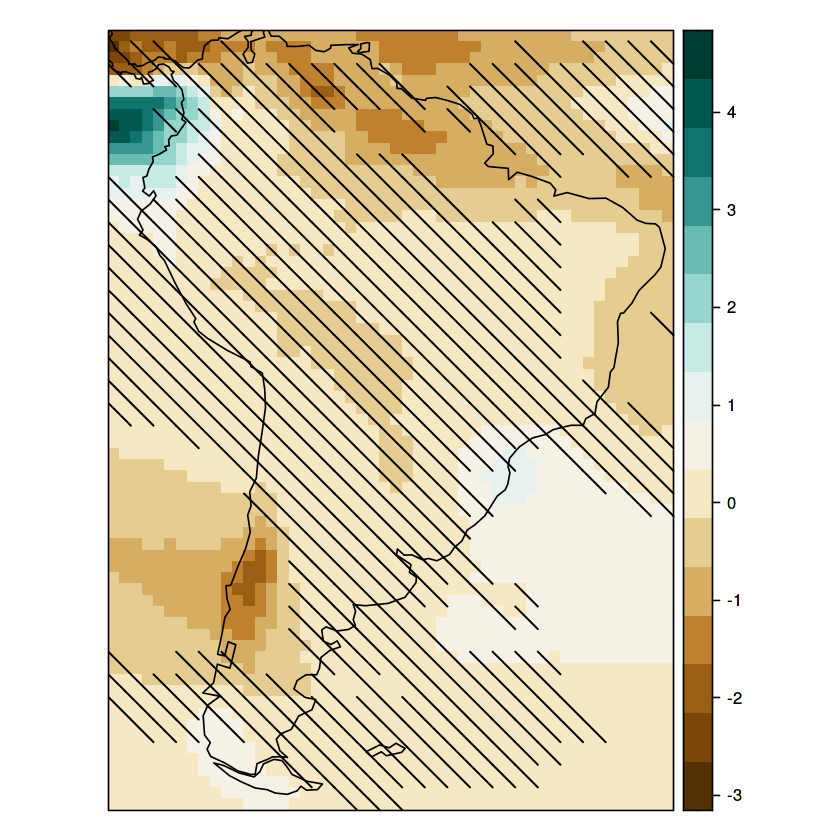

In [5]:
pl.simple.sam <- AR6.WGI.hatching(delta = delta, method = "simple", 
                                  map.hatching.args = list(density = 2, lwd = 1.2), 
                                  color.theme = "BrBG")
pl.simple.sam

To plot the relative delta it needs to be provided (available in this repository as auxiliary material). Add more graphical parameters until the desired output is obtained.

In [6]:
rel.delta <- loadGridData("auxiliary-material/CMIP6_SAM_ssp585_JJA_pr_2081-2100_relative_delta.nc", var = "pr")
pl.simple.sam <- AR6.WGI.hatching(delta = delta, relative.delta = rel.delta, method = "simple", 
                                  map.hatching.args = list(density = 2, lwd = 1.2), 
                                  color.theme = "BrBG", set.max = 50, set.min = -50)

[2021-08-03 16:03:44] Defining geo-location parameters

[2021-08-03 16:03:44] Defining time selection parameters

[2021-08-03 16:03:44] Retrieving data subset ...

[2021-08-03 16:03:44] Done

[2021-08-03 16:03:44] - Aggregating members...

[2021-08-03 16:03:44] - Done.

[2021-08-03 16:03:44] - Computing climatology...

[2021-08-03 16:03:44] - Done.



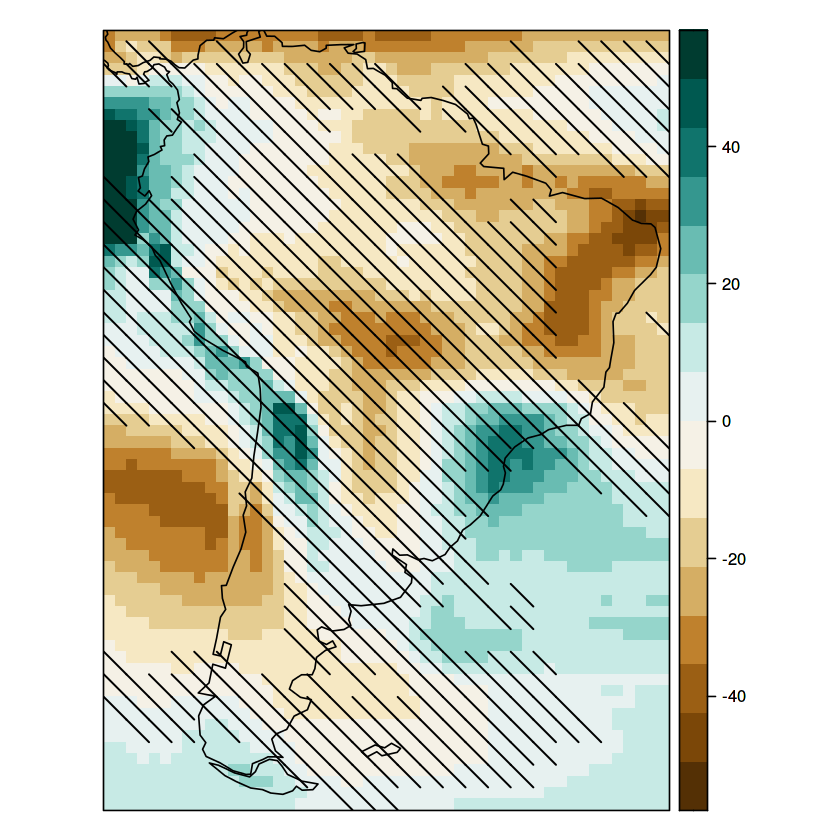

In [7]:
pl.simple.sam

We can change to the `advanced` method easily. The advanced method is based on the presence/absernce of signal w.r.t the interannual variability of a reference period (here pre-industrial, 1850-1900). This method has two components:
 * The areas with absence of signals are hatched
 * The areas with presence of signal but absence of model agreement are hatched.

[2021-08-03 16:03:45] - Aggregating members...

[2021-08-03 16:03:45] - Done.

[2021-08-03 16:03:46] - Computing climatology...

[2021-08-03 16:03:51] - Done.

[2021-08-03 16:03:51] - Aggregating members...

[2021-08-03 16:03:51] - Done.

[2021-08-03 16:03:51] - Aggregating members...

[2021-08-03 16:03:51] - Done.

[2021-08-03 16:03:51] - Computing climatology...

[2021-08-03 16:03:51] - Done.

[2021-08-03 16:03:52] - Computing climatology...

[2021-08-03 16:03:52] - Done.



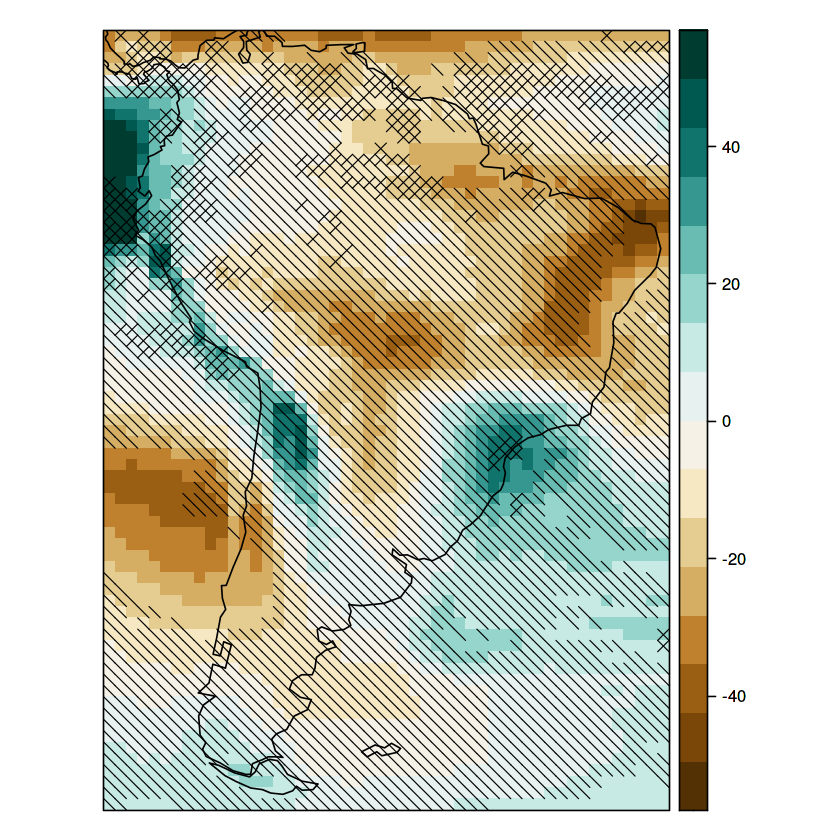

In [8]:
pl.advanced.sam <- AR6.WGI.hatching(delta = delta, historical.ref = ref, relative.delta = rel.delta, method = "advanced", 
                                  map.hatching.args = list(density = 1, lwd = 0.7), 
                                  color.theme = "BrBG", set.max = 50, set.min = -50)
pl.advanced.sam

To export the map you can use the following code:

```r
pdf("mymap.pdf")
pl.advanced.eur
dev.off()
```

### (B) The explicit STEP-BY-STEP way to create maps including uncertainty information 

The **data used in this example** is available under the [auxiliary-material](./auxiliary-material) folder. They are two NetCDFs containing historical and RCP 8.5 precipitation climatologies for the 1986-2005 and 2041-2060 periods, respectively, and for a reduced set of CMIP5 models. 

You can use the `dataInventory` function from `loadeR` to check basic data information:

In [9]:
di <- dataInventory("auxiliary-material/CMIP6_historical_JJA_pr_1995-2014.nc")

[2021-08-03 16:03:56] Doing inventory ...

[2021-08-03 16:03:56] Retrieving info for 'pr' (0 vars remaining)

[2021-08-03 16:03:56] Done.



These data can be loaded into variables using `loadGridData`.

In [10]:
hist <- loadGridData("auxiliary-material/CMIP6_historical_JJA_pr_1995-2014.nc", var = "pr")
scen <- loadGridData("auxiliary-material/CMIP6_ssp585_JJA_pr_2081-2100.nc", var = "pr")

[2021-08-03 16:03:56] Defining geo-location parameters

[2021-08-03 16:03:56] Defining time selection parameters

[2021-08-03 16:03:56] Retrieving data subset ...

[2021-08-03 16:03:57] Done

[2021-08-03 16:03:57] Defining geo-location parameters

[2021-08-03 16:03:57] Defining time selection parameters

[2021-08-03 16:03:57] Retrieving data subset ...

[2021-08-03 16:03:57] Done



### Parameter settings

We set some graphical parameters affecting the colorbar:

In [11]:
max.value <- 60
min.value <- -60
step.value <- 5
color.theme <- "BrBG"
reverse.colors <- FALSE

A list of color themes to use from `RColorBrewer` package can be obtained by issuing:

`RColorBrewer::display.brewer.all()`

The following only affect the legend of the final figure. These values correspond to the data loaded above (see [load-remote-data_R.ipynb](./load-remote-data_R.ipynb)).

In [12]:
future.period <- 2081:2100
season <- "JJA"

### Calculate delta change

Future delta changes are the arithmetic difference between future and historical time slice climatologies. Relative deltas can also be calculated with respect to the multi-model mean. 


In [13]:
delta <- gridArithmetics(climatology(scen), climatology(hist), operator = "-")
ensemble.mean <- function(grid) aggregateGrid(grid, aggr.mem = list(FUN = mean, na.rm = T))
delta.ens <- ensemble.mean(delta)
hist.ens <- ensemble.mean(climatology(hist))
# Relative delta
rel.delta <- gridArithmetics(delta.ens, 
                             hist.ens, 
                             100, 
                             operator = c("/", "*"))

[2021-08-03 16:03:57] - Computing climatology...

[2021-08-03 16:04:14] - Done.

[2021-08-03 16:04:16] - Computing climatology...

[2021-08-03 16:04:31] - Done.

[2021-08-03 16:04:33] - Aggregating members...

[2021-08-03 16:04:34] - Done.

[2021-08-03 16:04:34] - Computing climatology...

[2021-08-03 16:04:50] - Done.

[2021-08-03 16:04:51] - Aggregating members...

[2021-08-03 16:04:51] - Done.



Check the output with a first visualization of the delta change for each member of the ensemble.

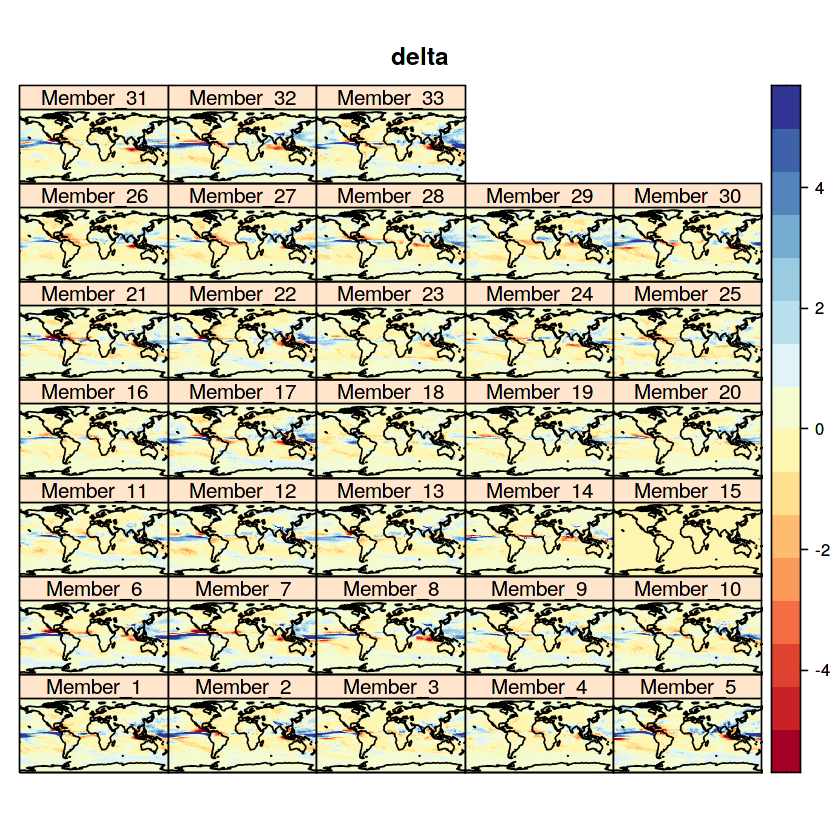

In [14]:
spatialPlot(delta, backdrop.theme = "coastline", main = "delta", 
           set.max = 5, set.min = -5)

And this would be the relative delta change for the ensemble mean.

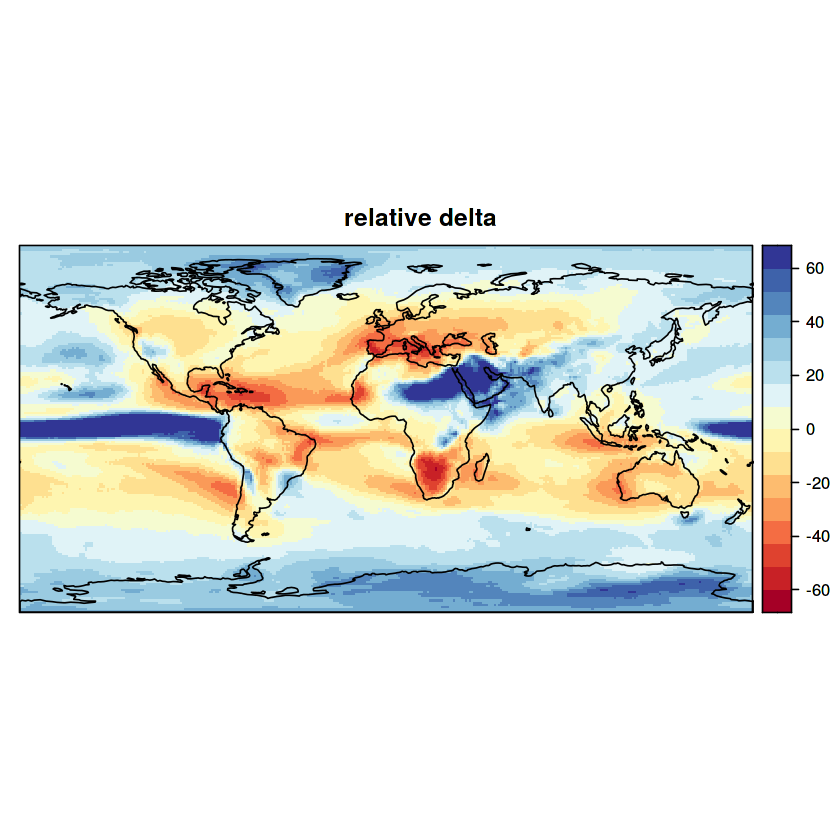

In [15]:
spatialPlot(rel.delta, backdrop.theme = "coastline", main = "relative delta", 
           set.max = max.value, set.min = min.value)

 ### The "simple" uncertainty method

We compute now the simple uncertainty measure (`agreement` function) and check the result visually. Note that argument `th` allows to set the agreement threshold.

[2021-08-03 16:05:13] - Aggregating members...

[2021-08-03 16:05:14] - Done.



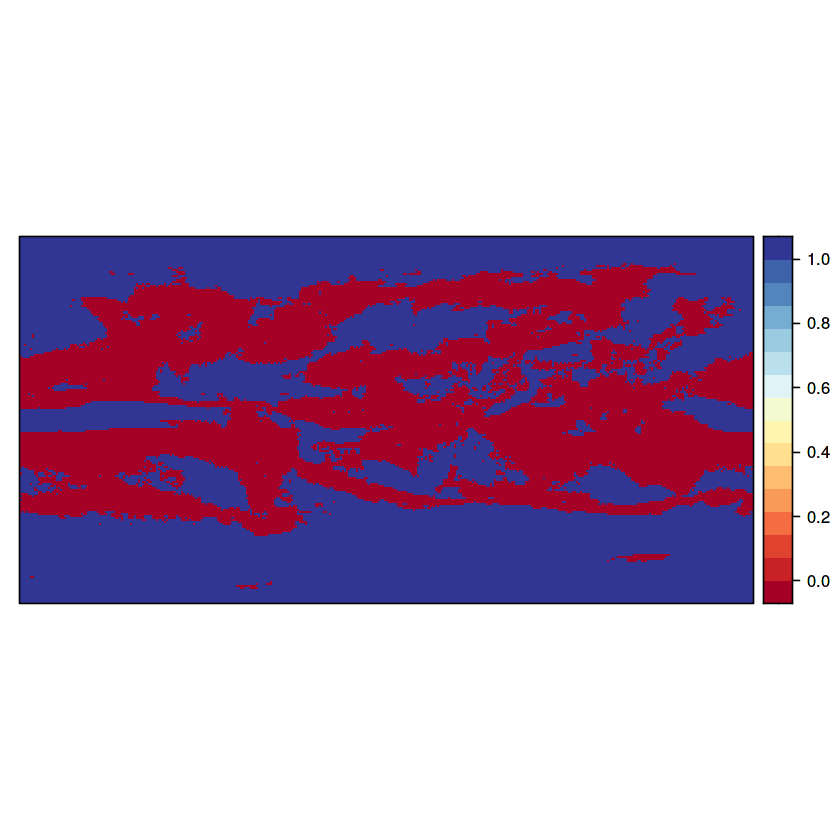

In [16]:
simple <- aggregateGrid(delta, aggr.mem = list(FUN = agreement, th = 80))
spatialPlot(simple)

This simple approach represents model agreement with two categories: 1 indicates high model agreement, where at least 80% of models agree on the sign of change; 0 indicates low model agreement, where fewer than 80% of models agree on sign of change. For more information on the simple approach, please refer to the AR6 WGI Cross-Chapter Box Atlas 1. Note that model agreement is computed at a gridbox level and is not representative of regionally aggregated results over larger regions.

This binary mask can be used to create the spatial object of the hatches, which we will then overlay on the original plots, hatching the areas where there is not enough model agreement. Let's obtain the hatching and check visually.

[2021-08-03 16:05:14] - Computing climatology...

[2021-08-03 16:05:15] - Done.



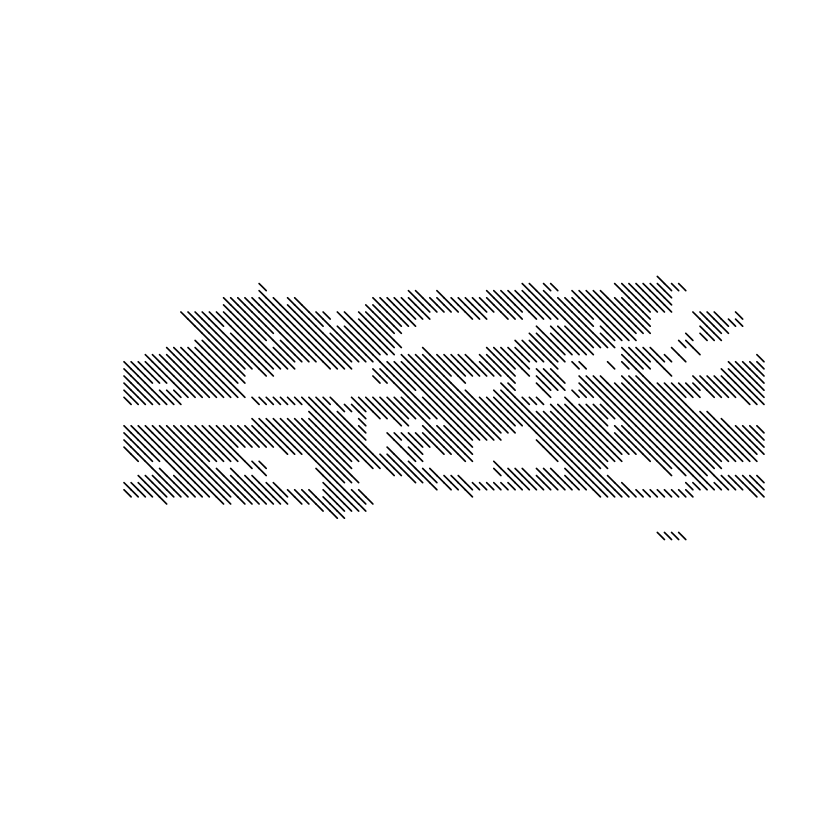

In [17]:
simple.hatch <- map.hatching(clim = climatology(simple), threshold = "0.5", angle = "-45",
                             condition = "LT", density = 4,  lwd = 0.6,
                             upscaling.aggr.fun = list(FUN = mean))
plot(simple.hatch[[2]])

We can overlay the hatching on the relative delta to produce the final figure (the hatches are passed to argument `sp.layout`)

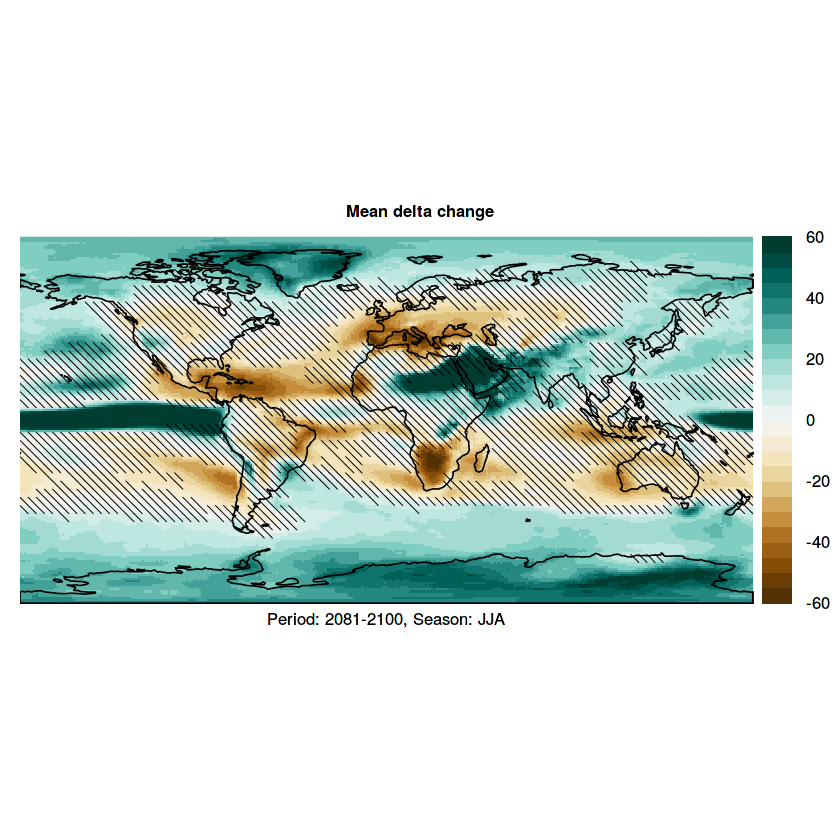

In [18]:
pl.simple <- spatialPlot(rel.delta, 
            color.theme = color.theme, 
            rev.colors = reverse.colors, 
            at = seq(min.value, max.value, step.value), 
            set.max = max.value, set.min = min.value,
            backdrop.theme = "coastline",
            main = list("Mean delta change", cex = 0.8),
            xlab = list(paste0("Period: ", paste(range(future.period), collapse = "-"), ", Season: ", season), cex = 0.8),
            sp.layout = list(simple.hatch),
            par.settings = list(axis.line = list(col = 'transparent')))
pl.simple

 ### The "advanced" uncertainty method

The advanced method is based on the presence/absernce of signal w.r.t the interannual variability of a reference period (here 1850-1900). This method has two components:
 * The areas with absence of signals are hatched
 * The areas with presence of signal but absence of model agreement are hatched.
 
To calculate the signal we need the data of the delta change and anual data of the historical reference. Due to file size restrictions on GitHub we do not include the global historical reference. However it would be load as follows:

`ref <- loadGridData("auxiliary-material/CMIP6_historical_JJA_1850-1900_annual.nc", var = "pr")`

Then we would calculate the signal as follows:

`sign <- signal(h = ref, d = delta)`

This repository includes the pre-calculated grid of the signal, load it in the following cell:

In [19]:
sign <- loadGridData("auxiliary-material/CMIP6_ssp585_JJA_pr_2081-2100_signal.nc", var = "pr_signal")

[2021-08-03 16:05:19] Defining geo-location parameters

[2021-08-03 16:05:19] Defining time selection parameters

[2021-08-03 16:05:19] Retrieving data subset ...

[2021-08-03 16:05:20] Done



To obtain the overall signal of the ensemble we use the auxiliary functions `signal.ens1` and `signal.ens2`, which apply a threshold to the ensemble mean signal. 

In [20]:
advanced1 <- aggregateGrid(sign, aggr.mem = list(FUN = signal.ens1, th = 66))

[2021-08-03 16:05:20] - Aggregating members...

[2021-08-03 16:05:20] - Done.



In [21]:
advanced2.aux <- aggregateGrid(sign, aggr.mem = list(FUN = signal.ens2, th = 66))

[2021-08-03 16:05:20] - Aggregating members...

[2021-08-03 16:05:20] - Done.



`signal.ens1` returns the first component of the advanced method (where 0 = absence of signal), while `signal.ens2` returns an intermediate grid (where 0 = presence of signal) to calculate the second component in an additional step. 

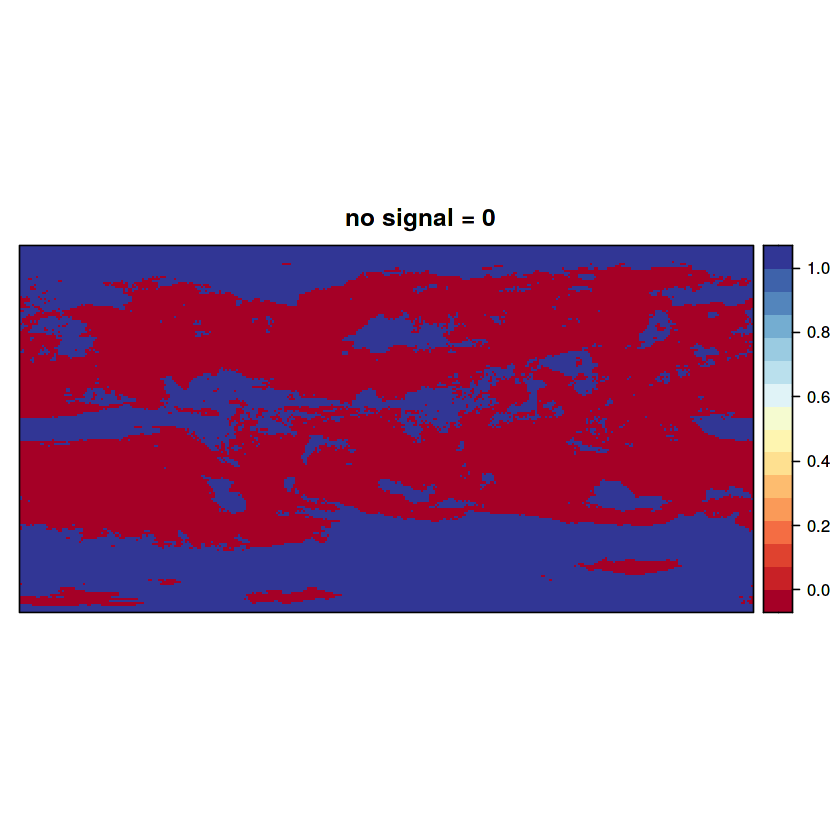

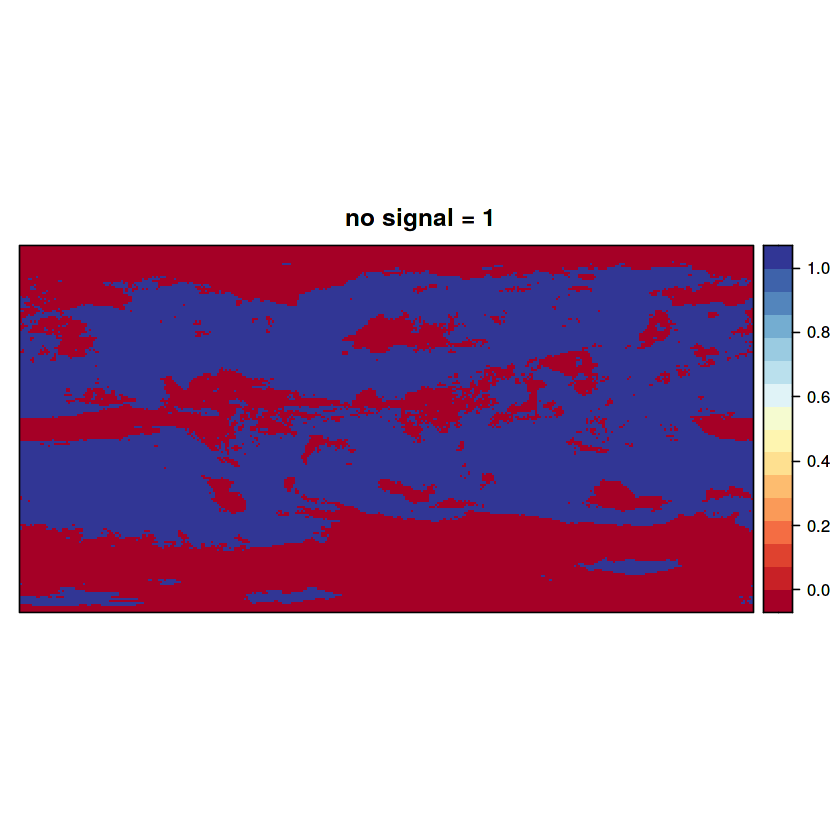

In [22]:
spatialPlot(advanced1, main = "no signal = 0")
spatialPlot(advanced2.aux, main = "no signal = 1")

The additional step consists in sumarizing this map (`advanced2.aux`) with the map we got with the simple approach (`simple`), as a result, we get a map of three values:

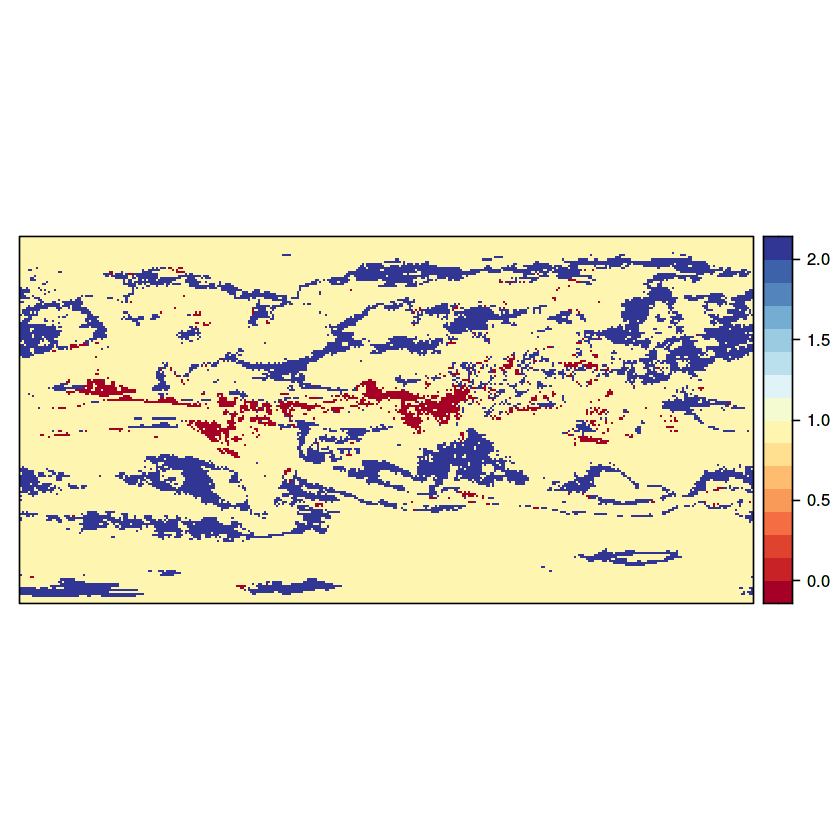

In [23]:
advanced2.aux <- gridArithmetics(advanced2.aux, simple, operator = "+") 
spatialPlot(advanced2.aux)

where...
 * no signal (1) + agreement (1) = 2
 * no signal (1) + disagreement (0) = 1
 * signal (0) + agreement (1) = 1
 * signal (0) + disagreement (0) = 0
 
The second component of the advanced method hatches the forth option, i.e. the 0 value (there is signal but there is no agreement).

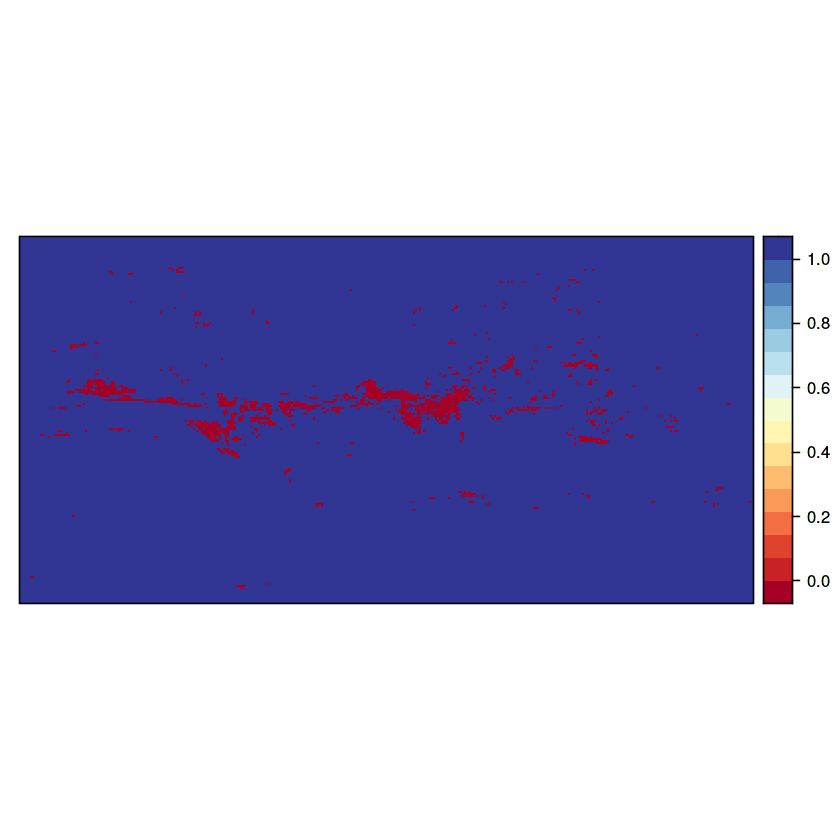

In [24]:
advanced2 <- binaryGrid(advanced2.aux, condition = "GT", threshold = 0)
spatialPlot(advanced2)


We can now create the hatches for the two components of the advanced mehtod (`advanced1` and `advanced2`). For the second component we opted for using crosses to obscure the map, to do this we simply repeat the `map.hatching` function application, but using different angles (`angle = "45"` and `angle = "-45"`) each time.

In [25]:
advanced1.hatch <- map.hatching(climatology(advanced1), threshold = 0.8, angle = "-45",
                               condition = "LT", density = 4,  lwd = 0.6,
                               upscaling.aggr.fun = list(FUN = mean))
advanced2.hatch <- map.hatching(climatology(advanced2), threshold = 0.8, angle = "45",
                               condition = "LT", density = 4,  lwd = 0.6,
                               upscaling.aggr.fun = list(FUN = mean))
advanced2.hatch.bis <- map.hatching(climatology(advanced2), threshold = 0.8, angle = "-45",
                                  condition = "LT", density = 4,  lwd = 0.6,
                                  upscaling.aggr.fun = list(FUN = mean))

[2021-08-03 16:05:23] - Computing climatology...

[2021-08-03 16:05:24] - Done.

[2021-08-03 16:05:26] - Computing climatology...

[2021-08-03 16:05:26] - Done.

[2021-08-03 16:05:27] - Computing climatology...

[2021-08-03 16:05:27] - Done.



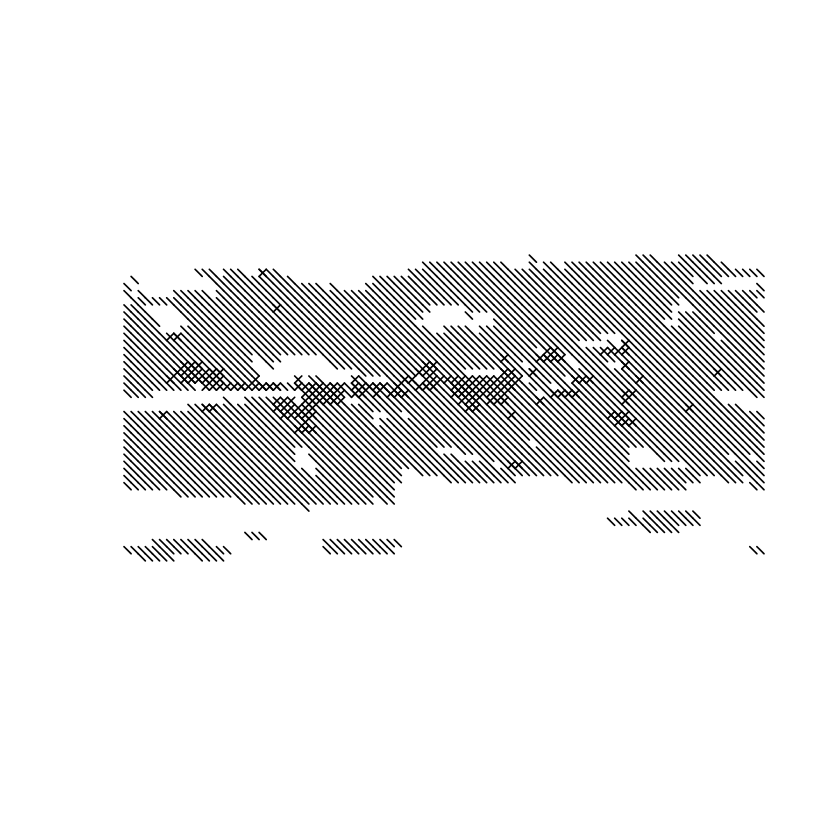

In [26]:
plot(advanced1.hatch[[2]])
plot(advanced2.hatch[[2]], add = TRUE)
plot(advanced2.hatch.bis[[2]], add = TRUE)

We can overlay the hatching on the relative delta to produce the final figure (the hatches are passed to argument `sp.layout`)

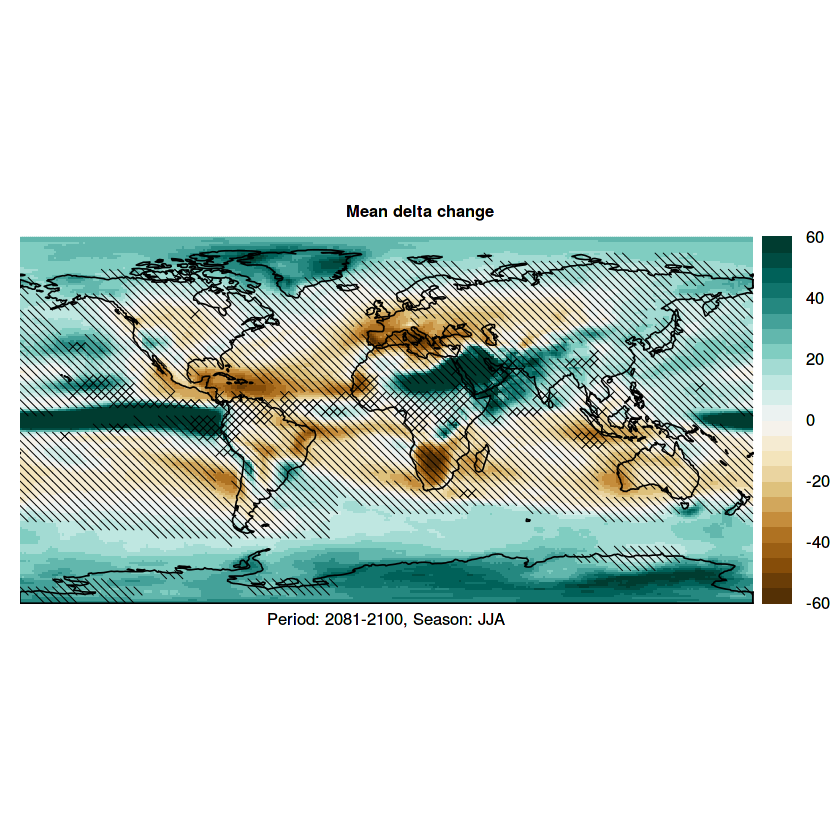

In [27]:
pl.advanced <- spatialPlot(rel.delta, 
            color.theme = color.theme, 
            rev.colors = reverse.colors, 
            at = seq(min.value, max.value, step.value), 
            set.max = max.value, set.min = min.value,
            backdrop.theme = "coastline",
            main = list("Mean delta change", cex = 0.8),
            xlab = list(paste0("Period: ", paste(range(future.period), collapse = "-"), ", Season: ", season), cex = 0.8),
            sp.layout = list(advanced1.hatch, advanced2.hatch, advanced2.hatch.bis),
            par.settings = list(axis.line = list(col = 'transparent')))
pl.advanced

We could also add the hatching to the ensemble mean of the absolute deltas (instead of the relative ones) just replacing in the above code the first line by:
```R
pl <- spatialPlot(ensemble.mean(delta), ...
```

### Session Information

In [28]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 14.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/libblas/libblas.so.3.0
LAPACK: /usr/lib/lapack/liblapack.so.3.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] sp_1.4-2            visualizeR_1.6.0    transformeR_2.1.2  
[4] loadeR_1.7.0        climate4R.UDG_0.2.3 loadeR.java_1.1.1  
[7] rJava_0.9-13       

loaded via a namespace (and not attached):
 [1] padr_0.5.1              pbdZMQ_0.3-3            RcppEigen_0.3.3.7.